In [55]:
#pip install openpyxl

In [14]:
import pandas as pd
import glob
import os

In [123]:
folder_path = "Dataset Raw"
all_files = glob.glob(os.path.join(folder_path, "*.xlsx"))

df_list = []

for file in all_files:
    try:
        # Baca file Excel
        df = pd.read_excel(file)

        # Ambil hanya baris 8–39 (ingat: Python pakai index 0, jadi 7:40)
        df_filtered = df.iloc[7:38, :]

        # (Opsional) Reset index supaya rapi
        df_filtered.reset_index(drop=True, inplace=True)

        df_list.append(df_filtered)
        print(f"✅ Berhasil baca dan filter: {os.path.basename(file)}")

    except Exception as e:
        print(f"⚠️ Gagal membaca {file}: {e}")

merged_df = pd.concat(df_list, ignore_index=True)
#merged_df.drop_duplicates(inplace=True)

merged_df.to_excel("hasil_gabungan.xlsx", index=False )

✅ Berhasil baca dan filter: 1-laporan_iklim_harian.xlsx
✅ Berhasil baca dan filter: 10-laporan_iklim_harian.xlsx
✅ Berhasil baca dan filter: 11-laporan_iklim_harian.xlsx
✅ Berhasil baca dan filter: 12-laporan_iklim_harian.xlsx
✅ Berhasil baca dan filter: 13-laporan_iklim_harian.xlsx
✅ Berhasil baca dan filter: 14-laporan_iklim_harian.xlsx
✅ Berhasil baca dan filter: 15-laporan_iklim_harian.xlsx
✅ Berhasil baca dan filter: 16-laporan_iklim_harian.xlsx
✅ Berhasil baca dan filter: 17-laporan_iklim_harian.xlsx
✅ Berhasil baca dan filter: 18-laporan_iklim_harian.xlsx
✅ Berhasil baca dan filter: 19-laporan_iklim_harian.xlsx
✅ Berhasil baca dan filter: 1Feb15-laporan_iklim_harian.xlsx
✅ Berhasil baca dan filter: 1Jan15-laporan_iklim_harian.xlsx
✅ Berhasil baca dan filter: 1Mar15-laporan_iklim_harian.xlsx
✅ Berhasil baca dan filter: 2-laporan_iklim_harian.xlsx
✅ Berhasil baca dan filter: 20-laporan_iklim_harian.xlsx
✅ Berhasil baca dan filter: 21-laporan_iklim_harian.xlsx
✅ Berhasil baca dan f

In [124]:
new_df = pd.read_excel('hasil_gabungan.xlsx')

new_df.columns=["TANGGAL", "TN", "TX", "TAVG", "RH_AVG", "RR", 
    "SS", "FF_X", "DDD_X", "FF_AVG", "DDD_CAR"]

In [125]:
new_df["TANGGAL"] = pd.to_datetime(new_df["TANGGAL"], format="%d-%m-%Y", errors="coerce")
#new_df = df.dropna(subset=["TANGGAL"])  # buang baris kosong kalau mau
new_df.to_excel("data_bersih.xlsx", index=False)


In [127]:
new_df["TANGGAL"].dt.year.value_counts()


TANGGAL
2021.0    368
2020.0    367
2024.0    366
2016.0    366
2023.0    365
2022.0    365
2017.0    365
2018.0    365
2015.0    364
2019.0    364
2025.0    300
Name: count, dtype: int64

In [128]:
new_df.isna().sum()

TANGGAL    75
TN         75
TX         75
TAVG       75
RH_AVG     75
RR         75
SS         75
FF_X       75
DDD_X      75
FF_AVG     75
DDD_CAR    75
dtype: int64

In [129]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4030 entries, 0 to 4029
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   TANGGAL  3955 non-null   datetime64[ns]
 1   TN       3955 non-null   object        
 2   TX       3955 non-null   object        
 3   TAVG     3955 non-null   object        
 4   RH_AVG   3955 non-null   object        
 5   RR       3955 non-null   object        
 6   SS       3955 non-null   object        
 7   FF_X     3955 non-null   float64       
 8   DDD_X    3955 non-null   float64       
 9   FF_AVG   3955 non-null   float64       
 10  DDD_CAR  3955 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(7)
memory usage: 346.5+ KB


In [132]:
# Hapus baris kosong (semua kolom NaN)
new_df.dropna(how="all", inplace=True)
# Reset index biar rapi
#new_df.reset_index(drop=True, inplace=True)
new_df.to_excel('tes1.xlsx')

In [ ]:
new_df2 = pd.read_excel('tes1.xlsx') # INI DATA FIX COK ANJAY

In [134]:
new_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3955 entries, 0 to 3954
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  3955 non-null   int64         
 1   TANGGAL     3955 non-null   datetime64[ns]
 2   TN          3955 non-null   object        
 3   TX          3955 non-null   object        
 4   TAVG        3955 non-null   object        
 5   RH_AVG      3955 non-null   object        
 6   RR          3955 non-null   object        
 7   SS          3955 non-null   object        
 8   FF_X        3955 non-null   int64         
 9   DDD_X       3955 non-null   int64         
 10  FF_AVG      3955 non-null   int64         
 11  DDD_CAR     3955 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(7)
memory usage: 370.9+ KB


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3879 entries, 0 to 3878
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   TANGGAL  3879 non-null   object 
 1   TN       3879 non-null   object 
 2   TX       3879 non-null   object 
 3   TAVG     3879 non-null   object 
 4   RH_AVG   3879 non-null   object 
 5   RR       3879 non-null   object 
 6   SS       3879 non-null   object 
 7   FF_X     3879 non-null   float64
 8   DDD_X    3879 non-null   float64
 9   FF_AVG   3879 non-null   float64
 10  DDD_CAR  3879 non-null   object 
dtypes: float64(3), object(8)
memory usage: 333.5+ KB


In [42]:
df['TANGGAL'].unique().sum()

'01-01-202302-01-202303-01-202304-01-202305-01-202306-01-202307-01-202308-01-202309-01-202310-01-202311-01-202312-01-202313-01-202314-01-202315-01-202316-01-202317-01-202318-01-202319-01-202320-01-202321-01-202322-01-202323-01-202324-01-202325-01-202326-01-202327-01-202328-01-202329-01-202330-01-202301-10-202302-10-202303-10-202304-10-202305-10-202306-10-202307-10-202308-10-202309-10-202310-10-202311-10-202312-10-202313-10-202314-10-202315-10-202316-10-202317-10-202318-10-202319-10-202320-10-202321-10-202322-10-202323-10-202324-10-202325-10-202326-10-202327-10-202328-10-202329-10-202330-10-202301-11-202302-11-202303-11-202304-11-202305-11-202306-11-202307-11-202308-11-202309-11-202310-11-202311-11-202312-11-202313-11-202314-11-202315-11-202316-11-202317-11-202318-11-202319-11-202320-11-202321-11-202322-11-202323-11-202324-11-202325-11-202326-11-202327-11-202328-11-202329-11-202330-11-202301-12-202302-12-202303-12-202304-12-202305-12-202306-12-202307-12-202308-12-202309-12-202310-12-202

In [2]:
#asli

import pandas as pd
import glob
import os

folder_path = "Dataset"

# Ambil semua file Excel di folder
excel_files = glob.glob(os.path.join(folder_path, "*-laporan_iklim_harian.xlsx"))

# Urutkan berdasarkan angka di depan nama file (misal 1-, 2-, 10-)
excel_files = sorted(
    excel_files,
    key=lambda x: int(os.path.basename(x).split('-')[0]),
    reverse=True
    # ambil angka sebelum tanda '-'
)

all_data = []

for file in excel_files:
    print(f"🔹 Sedang memproses: {file}")
    
    df = pd.read_excel(file)
    total_rows = len(df)
    
    rows_to_delete = list(range(0, 7)) + list(range(35, 54))
    rows_to_delete = [i for i in rows_to_delete if i < total_rows]
    
    df = df.drop(rows_to_delete).reset_index(drop=True)
    all_data.append(df)

# Gabungkan semua file jadi satu
final_df = pd.concat(all_data, ignore_index=True)

final_df.columns = [
    "TANGGAL", "TN", "TX", "TAVG", "RH_AVG", "RR", 
    "SS", "FF_X", "DDD_X", "FF_AVG", "DDD_CAR"
]

output_path = os.path.join(folder_path, "gabungan_laporan_iklim4.xlsx")
final_df.to_excel(output_path, index=False)

print("✅ Semua file sudah digabung urut sesuai bulan.")


🔹 Sedang memproses: Dataset\34-laporan_iklim_harian.xlsx
🔹 Sedang memproses: Dataset\33-laporan_iklim_harian.xlsx
🔹 Sedang memproses: Dataset\32-laporan_iklim_harian.xlsx
🔹 Sedang memproses: Dataset\31-laporan_iklim_harian.xlsx
🔹 Sedang memproses: Dataset\30-laporan_iklim_harian.xlsx
🔹 Sedang memproses: Dataset\29-laporan_iklim_harian.xlsx
🔹 Sedang memproses: Dataset\28-laporan_iklim_harian.xlsx
🔹 Sedang memproses: Dataset\27-laporan_iklim_harian.xlsx
🔹 Sedang memproses: Dataset\26-laporan_iklim_harian.xlsx
🔹 Sedang memproses: Dataset\25-laporan_iklim_harian.xlsx
🔹 Sedang memproses: Dataset\24-laporan_iklim_harian.xlsx
🔹 Sedang memproses: Dataset\23-laporan_iklim_harian.xlsx
🔹 Sedang memproses: Dataset\22-laporan_iklim_harian.xlsx
🔹 Sedang memproses: Dataset\21-laporan_iklim_harian.xlsx
🔹 Sedang memproses: Dataset\20-laporan_iklim_harian.xlsx
🔹 Sedang memproses: Dataset\19-laporan_iklim_harian.xlsx
🔹 Sedang memproses: Dataset\18-laporan_iklim_harian.xlsx
🔹 Sedang memproses: Dataset\17-

ValueError: Length mismatch: Expected axis has 13 elements, new values have 11 elements

# Data Cleaning

In [2]:
import pandas as pd

df = pd.read_excel("Dataset/gabungan_laporan_iklim_final.xlsx")



In [3]:
df.head(5)

,TANGGAL,TN,TX,TAVG,RH_AVG,RR,SS,FF_X,DDD_X,FF_AVG,DDD_CAR
0,01-01-2023,23.6,29.8,26.3,87,14.5,0,4,320,1,C
1,02-01-2023,24.2,29.4,27.5,81,31.5,0.7,4,320,2,NW
2,03-01-2023,25,29.6,26.6,82,0.5,0,6,316,1,C
3,04-01-2023,24.4,30,26.4,86,2.4,-,5,316,1,C
4,05-01-2023,24,32.6,27.4,83,35.3,-,4,317,2,C


In [4]:
df.describe()

,FF_X,DDD_X,FF_AVG
count,896.000000,896.000000,896.000000
mean,4.522321,263.960938,1.125000
std,1.694405,92.409978,0.534821
min,0.000000,0.000000,0.000000
25%,3.000000,250.000000,1.000000
50%,4.000000,310.000000,1.000000
75%,5.000000,320.000000,1.000000
max,15.000000,360.000000,3.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   TANGGAL  896 non-null    object
 1   TN       896 non-null    object
 2   TX       896 non-null    object
 3   TAVG     896 non-null    object
 4   RH_AVG   896 non-null    object
 5   RR       896 non-null    object
 6   SS       896 non-null    object
 7   FF_X     896 non-null    int64 
 8   DDD_X    896 non-null    int64 
 9   FF_AVG   896 non-null    int64 
 10  DDD_CAR  896 non-null    object
dtypes: int64(3), object(8)
memory usage: 77.1+ KB


In [6]:
df.isna().sum()

TANGGAL    0
TN         0
TX         0
TAVG       0
RH_AVG     0
RR         0
SS         0
FF_X       0
DDD_X      0
FF_AVG     0
DDD_CAR    0
dtype: int64

In [7]:
df['TANGGAL'] = pd.to_datetime(df['TANGGAL'], dayfirst=True, errors='coerce')

numeric_cols = ['TN', 'TX', 'TAVG', 'RH_AVG', 'RR', 'SS']

# Ganti '-' menjadi 8888 dulu
df[numeric_cols] = df[numeric_cols].replace('-', 8888)

# Ubah semuanya ke numeric
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')


C:\Users\Lenovo E15\AppData\Local\Temp\ipykernel_7644\125189427.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[numeric_cols] = df[numeric_cols].replace('-', 8888)


In [8]:
# Data mapping for DDR_CAR

mapping = {
    'C': 0, #Calm
    'N': 0, #North
    'NE': 45, #North East
    'E': 90, #East
    'SE': 135, #South East 
    'S': 180, #South
    'SW': 225, #South West 
    'W': 270, #West 
    'NW': 315 #North West
}

df['DDD_CAR'] = df['DDD_CAR'].map(mapping)

In [9]:
df.isna().sum()

TANGGAL      0
TN           0
TX           0
TAVG         0
RH_AVG       0
RR           0
SS           0
FF_X         0
DDD_X        0
FF_AVG       0
DDD_CAR    487
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   TANGGAL  896 non-null    datetime64[ns]
 1   TN       896 non-null    float64       
 2   TX       896 non-null    float64       
 3   TAVG     896 non-null    float64       
 4   RH_AVG   896 non-null    int64         
 5   RR       896 non-null    float64       
 6   SS       896 non-null    float64       
 7   FF_X     896 non-null    int64         
 8   DDD_X    896 non-null    int64         
 9   FF_AVG   896 non-null    int64         
 10  DDD_CAR  409 non-null    float64       
dtypes: datetime64[ns](1), float64(6), int64(4)
memory usage: 77.1 KB


In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
#Check how many rows in column RR has 8888 value


check8888 = (df == 8888).sum().sum()
print("8888 count in any column ", check8888)

check9999 = (df == 9999).sum().sum()
print("9999 count in any column ", check9999)



8888 count in any column  180
9999 count in any column  0


In [34]:
# Fill 8888 values in any colomn

import numpy as np
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

#We replace 8888 to nan 
df.replace(8888, np.nan, inplace=True)

#We select all of the column that has nan value
num_cols = ['TN', 'TX', 'TAVG', 'RH_AVG', 'RR', 'SS', 'FF_X', 'DDD_X', 'FF_AVG', 'DDD_CAR'] 

#InterativeImputer 

imputer = IterativeImputer(
    estimator=RandomForestRegressor(
        n_estimators=100,
        random_state=42
    ),
    random_state=42,
    max_iter=10
)

# Begin the imputer
df[num_cols] = imputer.fit_transform(df[num_cols])

#Save to another excel 


# ✅ Save to Excel (dataset final)
output_path = "dataset_final.xlsx"
df.to_excel(output_path, index=False)

print(f"✅ File berhasil disimpan sebagai '{output_path}'")


✅ File berhasil disimpan sebagai 'dataset_final.xlsx'


In [201]:
print(num_cols)
print(df.columns)

['TN', 'TX', 'TAVG', 'RH_AVG', 'RR', 'SS', 'FF_X', 'DDD_X', 'FF_AVG', 'DDD_CAR']
Index(['TANGGAL', 'TN', 'TX', 'TAVG', 'RH_AVG', 'RR', 'SS', 'FF_X', 'DDD_X',
       'FF_AVG', 'DDD_CAR'],
      dtype='object')


In [35]:
new_df = pd.read_excel('dataset_final.xlsx')

print(df[num_cols].isna().sum())

TN         0
TX         0
TAVG       0
RH_AVG     0
RR         0
SS         0
FF_X       0
DDD_X      0
FF_AVG     0
DDD_CAR    0
dtype: int64


In [36]:
check888after = (new_df == 8888).sum().sum()
print(check888after)

0


# EDA 

In [37]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   TANGGAL   887 non-null    datetime64[ns]
 1   TN        887 non-null    float64       
 2   TX        887 non-null    float64       
 3   TAVG      887 non-null    float64       
 4   RH_AVG    887 non-null    float64       
 5   RR        887 non-null    float64       
 6   SS        887 non-null    float64       
 7   FF_X      887 non-null    int64         
 8   DDD_X     887 non-null    int64         
 9   FF_AVG    887 non-null    int64         
 10  DDD_CAR   887 non-null    float64       
 11  RR_lag_1  887 non-null    float64       
 12  RR_lag_2  887 non-null    float64       
 13  RR_lag_3  887 non-null    float64       
 14  RR_1      887 non-null    float64       
 15  RR_2      887 non-null    float64       
 16  RR_3      887 non-null    float64       
dtypes: datetime64[ns

In [ ]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation =numeric_df.corrwith(df['RR']).abs()
print(correlation)

TN         0.461893
TX         0.353074
TAVG       0.413975
RH_AVG     0.415572
RR         1.000000
SS         0.212502
FF_X       0.063282
DDD_X      0.018903
FF_AVG     0.101697
DDD_CAR    0.036750
dtype: float64


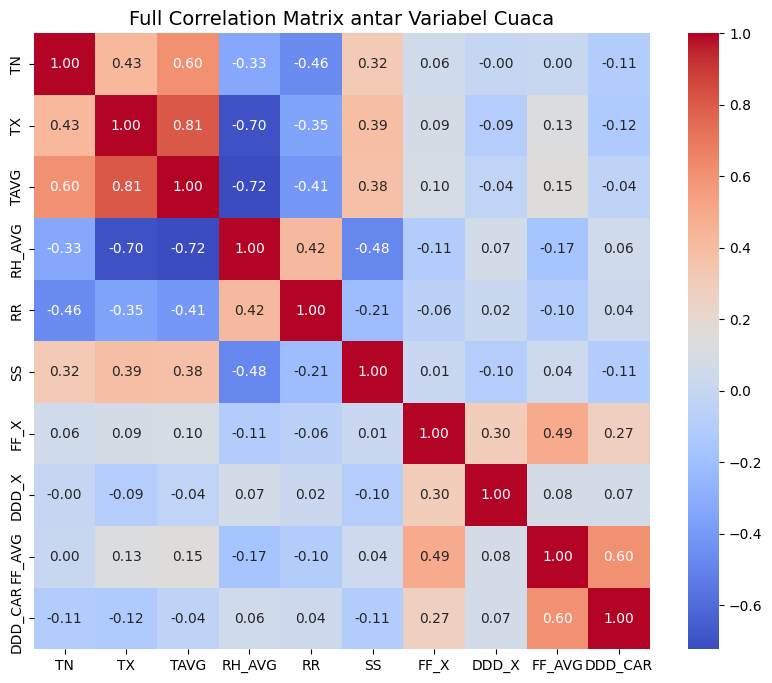

In [206]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pastikan kolom tanggal tidak ikut
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Buat matrix korelasi penuh
corr_matrix = numeric_df.corr()

# Visualisasikan dengan heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Full Correlation Matrix antar Variabel Cuaca', fontsize=14)
plt.show()

# Data Modelling